In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/winequality-red.csv'

white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


In [8]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [9]:
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [ ]:
fig = px.histogram(wine, x='quality', color = 'volatile acidity')   #컬러를 구분해서 나타냄 화이트 와인 레드와인 컬러 1,0으로 구분햇기 때문
fig.show()

In [12]:
X = wine.drop(['color'], axis = 1)
y = wine['color']

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 13)
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3913, 1284]))

In [18]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x = X_train['quality'], name= 'Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name='Test'))

# fig.update_layout(barmode = 'overlay')     #겹쳐그리기 실정
# fig.update_traces(opacity = 0.75)          # 투명도 0.75
# fig.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier                           #의사결정 트리 모델로 학습 시키는 과정

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)                  

DecisionTreeClassifier(max_depth=2, random_state=13)

In [17]:
from sklearn.metrics import accuracy_score           #학습 결과 확인하는 과정

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train,y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9553588608812776
0.9569230769230769


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()   # 객체 생성

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns= X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9553588608812776
0.9569230769230769


In [22]:
X_train,X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9553588608812776
0.9569230769230769


In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(wine_tree, feature_names=X_train.columns,
                       class_names=['W','R'],
                       rounded=True, filled=True))


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [24]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
 13  taste                 6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 761.4 KB


In [26]:
import pandas as pd

df = pd.DataFrame({
    'A' : ['a', 'b', 'c', 'a','b'],
    'B' : [1,2,3,1,0]
})
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [29]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [30]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [31]:
le.transform(['a','b'])

array([0, 1])

In [32]:
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [33]:
le.inverse_transform([1,2,2,2])

array(['b', 'c', 'c', 'c'], dtype=object)

In [34]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0


In [35]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) #분리

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)   # 모델 선택
wine_tree.fit(X_train, y_train) #학습

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.7294593034442948
0.7161538461538461


/home/uk/venv/eda_venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning:

divide by zero encountered in scalar divide

/home/uk/venv/eda_venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning:

divide by zero encountered in scalar divide

/home/uk/venv/eda_venv/lib/python3.10/site-packages/matplotlib/patches.py:787: RuntimeWarning:

invalid value encountered in scalar add

/home/uk/venv/eda_venv/lib/python3.10/site-packages/matplotlib/transforms.py:2049: RuntimeWarning:

invalid value encountered in scalar add



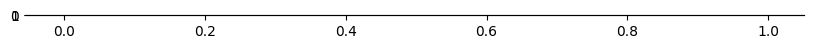

In [40]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,0))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.grid()
plt.show()